In [4]:
import numpy as np
from numpy import random
import scipy
from scipy.stats import beta
from scipy.stats import uniform
from scipy.stats import norm
from scipy.optimize import minimize
from matplotlib import pyplot as plt
import math

# Rejection Method
The probability density function for beta is:
\begin{align*}
    f(x,a,b)=\frac{Γ(a+b)x^{a−1}∗(1−x)^{b−1}}{Γ(a)Γ(b)}
\end{align*}
for $0<=x<=1$, $a>0$, $b>0$, where $Γ$ is the gamma function (scipy.special.gamma()). beta takes a and b as shape paramters. In this exercise, we will use two different sampling methods to generate $beta(\alpha=5,\beta=3)$. See the distribution below. In this lab, we will try two different simulation methods and compare their performance.



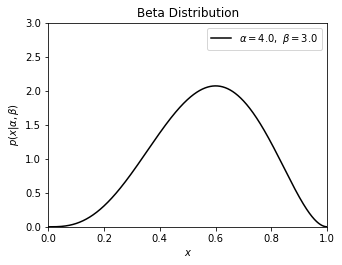

In [5]:
x = np.linspace(0, 1, 1002)[1:-1]
fig, ax = plt.subplots(figsize=(5, 3.75))
a=4
b=3
dist = beta(a, b)
plt.plot(x, dist.pdf(x), ls="-", c='black',label=r'$\alpha=%.1f,\ \beta=%.1f$' % (a, b))

plt.xlim(0, 1)
plt.ylim(0, 3)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|\alpha,\beta)$')
plt.title('Beta Distribution')

plt.legend(loc=0)
plt.show()

### a. Uniform Sampling

In [9]:
# Find max of beta, beta_max
a = 5
b = 3
d = beta(a, b)

# beta_max
x_max = (a - 1) / (a + b - 2)
beta_max = d.pdf(x_max)

# Generate a uniform distribution sample x between [0,1]
x = random.uniform(low=0., high=1.0, size=1000)

# Generate another uniform distribution sample between [0, beta_max]
y = random.uniform(low=0., high=beta_max, size=1000)

# For each x_i, compute the event weight w(x_i) and only keep x_i when w(x_i)<y w(x)=f(x)/g(x)=targetdist/pdf

# def g(x):
#     return norm.pdf(x)

# def w(x_i):
#     return f(x_i) / g(x_i)
   
    
def keep(N):   
    i = 0
    accept = np.zeros(N)
    iterations = 0 
    def W(x):
        a = 4
        b = 5
        return beta.pdf(x, a, b)
    while i < N:
        iterations = iterations + 1
        x = random.uniform(low=0., high=1.0, size=1)
        y = random.uniform(low=0., high=beta_max, size=1)
        w = W(x)
        if w >= y:            
            accept[i] = x
            i = i + 1
    return accept, iterations

#Generate this sample until accepted events N=1000 events
keep, iterations = keep(1000)

print(iterations)


2403


1. What is the event weight formula? <br>
The event weight formula is 
\begin{gather*}
w(x) = \frac{f(x)}{g(x)} \\
\end{gather*}
where, for a sample of y that we are comparing w(x) to that is uniform on the scaled interval $[0, beta_{max}]$
\begin{gather*}
g(x) = 1  \\
so, \\
w(x) = \beta(\alpha=4, \beta=5)
\end{gather*}

2. What is the total number of samplings (pairs of x, y) required for this MC simulation? <br>
The total number of samplings (pairs of x, y) required for this MC simulation is 2404, which is given by 2404 iterations of the while loop , which runs i number of iterations of adding to the accepted values array until there are i=N entries. When i is no longer less than N, meaning that the array is full of the desired nuber of accepted entires, the while loop will break. Each iteration of the loop is counter by a counter, named iterations in this case, which counts the number of samples taken with every pass through the while loop. We can see that for N=1000 accepted values, it takes more than twice the number of samples given that we are sampling from a unifrom distribution on the interval of $[0, beta_{max}]$.

### b. Gaussian Sampling

In [12]:
def keep2(N):   
    i = 0
    accept = np.zeros(N)
    def W(x):
        a = 4
        b = 5
        return beta.pdf(x, a, b) 
    iterations2 = 0
    while i < N:
        x = random.normal(loc=0.6, scale=0.2,size=1)
        y = random.uniform(low=0., high=beta_max, size=1)
        w = W(x)
        iterations2 = iterations2 + 1
        if w >= y:            
            accept[i] = x
            i = i + 1
    return accept, iterations2

#Generate this sample until accepted events N=1000 events
keep, iterations2 = keep2(1000)
print(iterations2)


1842


1. What is your choice of Gaussian distribtuion parameter for the importance sample? <br>
I chose a mean of 0.6 and standard deviation of 0.2 such that the normal distribution that we are sampling from has a shape that more closely resembles the beta distribution. The mean shifts the normal distribution such that its peak more closely matches the peak of the beta distribition and the standard deviation adjsuts the width of the entire distribition such that it also more closely matches that of the beta distribuitio we are tryijg to sample for. 
2. What is the event weight formula? <br>
The event weight formula is, like before, 
\begin{gather*}
w(x) = \frac{f(x)}{g(x)} \\
\end{gather*}
where, for a sample of y that we are comparing w(x) to that is uniform on the scaled interval $[0, beta_{max}]$
\begin{gather*}
g(x) = 1  \\
so, \\
w(x) = \beta(\alpha=4, \beta=5)
\end{gather*}

3. What is the total number of sampling (pairs of x, y) required for this MC simulation? How is this compared with the uniform sampling? <br>
The total number of sampling pairs is 1842 to get N=1000 accepted values. This is far less than the number of samples required when sampling from the uniform distribution, which makes sense as the normal distribution more closely resembles the beta distribition, so the probability of a sample of the normal distribtion at a given x having a value that fits within the beta distribution is higher than that with the sample of the uniform distribution. 


### c. Visualize

# Sphere in 3D
In this exercise we are going to calculate the mass of a 3D sphere with linearly increasing density. This problem is quite challenging to do analytically, but with Monte Carlo integration it is relatively easy.   <br>
Let's first start with the simple problem of determining the mass of a sphere with uniform density 
ρ0=2kg/m3. The sphere has a radius of 1 meter, and we initially integrate it with N=100 points.

### a. Uniform Density

In [16]:
theoretical_mass = (8 / 3) * math.pi
print(theoretical_mass)

def mass(N):
    points = np.zeros((N, 3))
    points[:, 0] = np.random.uniform(low=-1, high=1, size=N)
    points[:, 1] = np.random.uniform(low=-1, high=1, size=N)
    points[:, 2] = np.random.uniform(low=-1, high=1, size=N)
    def inside_sphere(points):
        inside = []
        for i in range(N):
            if np.sqrt(points[i, 0] ** 2 + points[i, 1] **2 + points[i, 2] ** 2) < 1:
                inside.append(1)
            else:
                inside.append(0)
        return inside
    inside = inside_sphere(points)
    density = 2 * np.count_nonzero(inside) * 8 / N
    return density
print(mass(100))   

Y = np.linspace(100, 100000, 100, dtype = int)
m_list = np.zeros(100)
m_variance = np.zeros(100)

for i in range(100):
    m_val = mass(Y[i])
    m_list[i] = m_val
    


uncertainty = np.sqrt(np.var(m_list))
print(uncertainty)

###part d

######################
#######################


8.377580409572781
7.68
0.04693426119602033
0.0


### b. Linear Density

In [ ]:
def mass(N):
    points = np.zeros((N, 3))
    points[:, 0] = np.random.uniform(low=-1, high=1, size=N)
    points[:, 1] = np.random.uniform(low=-1, high=1, size=N)
    points[:, 2] = np.random.uniform(low=-1, high=1, size=N)
    def inside_sphere(points):
        inside = []
        for i in range(N):
            if np.sqrt(points[i, 0] ** 2 + points[i, 1] **2 + points[i, 2] ** 2) < 1:
                inside.append(1)
            else:
                inside.append(0)
        return inside
    inside = inside_sphere(points)
    density = 2 * np.count_nonzero(inside) * 8 / N
    return density
print(mass(100))   

Y = np.linspace(100, 100000, 100, dtype = int)
m_list = np.zeros(100)
m_variance = np.zeros(100)

for i in range(100):
    m_val = mass(Y[i])
    m_list[i] = m_val
    


uncertainty = np.sqrt(np.var(m_list))
print(uncertainty)
